In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from scipy.stats import ttest_1samp
import seaborn as sns

In [2]:
#Store data in df and shuffle it
df = pd.read_csv('40431475/all_features.csv', sep="\t", header=None)

np.random.seed(42)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
#set up folds
kfolds = 5
kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)

#Set up results to be stored
best_acc = 0
best_combination = ""

results_data = {'25': [0]*4,'75': [0]*4,'125': [0]*4,'175': [0]*4,
           '225': [0]*4,'275': [0]*4,'325':[0]*4,'375':[0]*4}
results_index = [2,4,6,8]
results = pd.DataFrame(data=results_data,index=results_index,dtype=float)

In [4]:
#Train the models with the different Nt,Np values and cross validation in a triple loop
for Nt in range(25,376,50):
    for Np in [2,4,6,8]:
        accs = []
        for train_idx,test_idx in kf.split(df):
            train_data = df.iloc[train_idx]
            test_data = df.iloc[test_idx]

            x_train = train_data[list(range(2,18))]
            y_train = train_data[0]
            x_test = test_data[list(range(2,18))]
            y_test = test_data[0]

            model = RandomForestClassifier(n_estimators=Nt,max_features=Np)
            model.fit(x_train,y_train)

            acc = model.score(x_test, y_test)
            accs.append(acc)

        avg_acc = np.mean(accs)
        combination = "Number of Trees: "+str(Nt)+" Max features: "+str(Np)+ " Accuracy: "+str(avg_acc)
        print(combination)
        if avg_acc > best_acc:
            best_acc = avg_acc
            best_combination = combination

        results.loc[Np,str(Nt)] = avg_acc

Number of Trees: 25 Max features: 2 Accuracy: 0.7407692307692307
Number of Trees: 25 Max features: 4 Accuracy: 0.7646153846153846
Number of Trees: 25 Max features: 6 Accuracy: 0.7669230769230769
Number of Trees: 25 Max features: 8 Accuracy: 0.7792307692307692
Number of Trees: 75 Max features: 2 Accuracy: 0.7615384615384615
Number of Trees: 75 Max features: 4 Accuracy: 0.78
Number of Trees: 75 Max features: 6 Accuracy: 0.7846153846153847
Number of Trees: 75 Max features: 8 Accuracy: 0.7823076923076921
Number of Trees: 125 Max features: 2 Accuracy: 0.7746153846153845
Number of Trees: 125 Max features: 4 Accuracy: 0.7853846153846155
Number of Trees: 125 Max features: 6 Accuracy: 0.7876923076923077
Number of Trees: 125 Max features: 8 Accuracy: 0.7776923076923076
Number of Trees: 175 Max features: 2 Accuracy: 0.7769230769230768
Number of Trees: 175 Max features: 4 Accuracy: 0.7761538461538462
Number of Trees: 175 Max features: 6 Accuracy: 0.786923076923077
Number of Trees: 175 Max features

Best values are:  Number of Trees: 275 Max features: 6 Accuracy: 0.7892307692307693


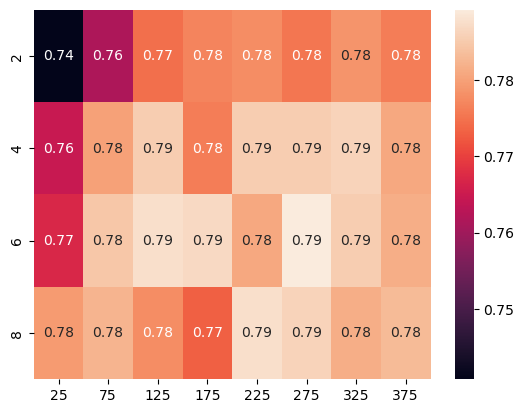

In [5]:
print("Best values are: ",best_combination)

sns.heatmap(results,annot=True)
plt.show()

In [6]:
#Repeat the training of the model with the best accuracy to determine how consistent it is
#set up folds
kfolds = 5
kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)
cross_val_accs = []
for x in range(15):
    accs = []
    for train_idx, test_idx in kf.split(df):
        train_data = df.iloc[train_idx]
        test_data = df.iloc[test_idx]
    
        x_train = train_data[list(range(2, 18))]
        y_train = train_data[0]
        x_test = test_data[list(range(2, 18))]
        y_test = test_data[0]
    
        model = RandomForestClassifier(n_estimators=275, max_features=6)
        model.fit(x_train, y_train)
        test_predicts = model.predict(x_test)

        acc = model.score(x_test, y_test)
        accs.append(acc)
    cross_val_acc = np.mean(accs)
    print(cross_val_acc)
    cross_val_accs.append(cross_val_acc)
print("Mean: ",np.mean(cross_val_accs))
print("Standard Deviation", np.std(cross_val_accs))

t,p = ttest_1samp(cross_val_accs,1/13)
print("T stat: ",t)
print("P Val: ",p)

0.7776923076923076
0.7861538461538462
0.7861538461538462
0.7830769230769231
0.7838461538461539
0.7823076923076921
0.7815384615384616
0.786923076923077
0.7823076923076924
0.7792307692307693
0.7853846153846155
0.786923076923077
0.7815384615384616
0.7838461538461539
0.79
Mean:  0.7837948717948717
Standard Deviation 0.0031083861457829407
T stat:  850.8827245844047
P Val:  2.1173496942445148e-34
